<a href="https://colab.research.google.com/github/snb1998/Hello/blob/main/ML4BI_E3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 3

In this exercise, you'll practice on the examples we went through during the lectures.

Try one or more!

1. You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy

2. Try using layers with more units or fewer units: 32 units, 64 units, and so on.

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): #use the loop instead of creating several functions
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

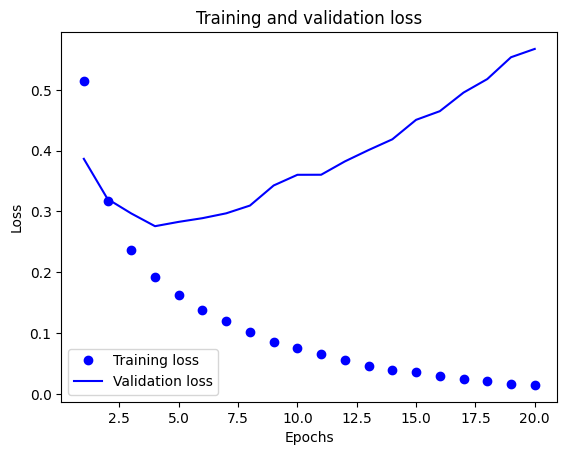

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")

Epoch with minimum validation loss: 4


**Remove one layer representation.**

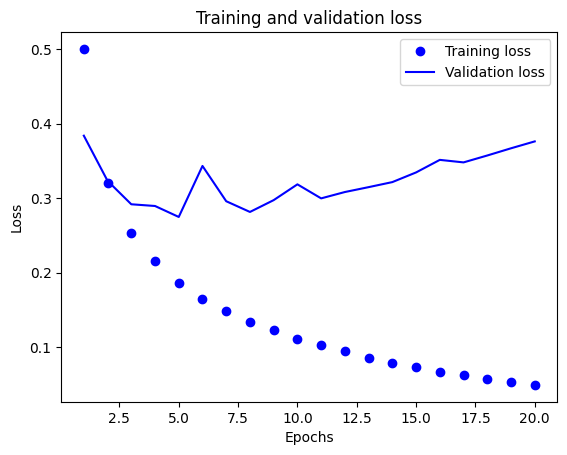

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")

Epoch with minimum validation loss: 5


**Add more units**

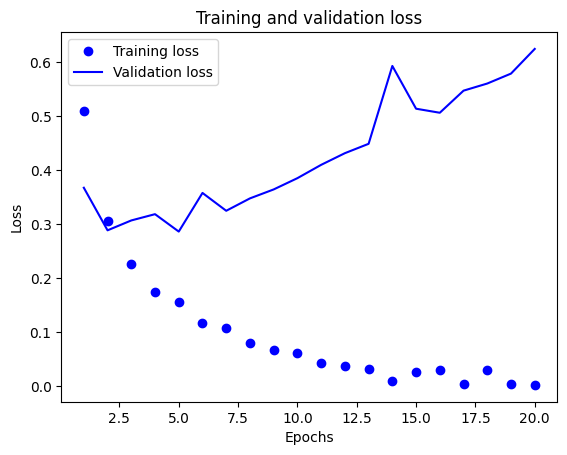

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Access the history for the validation loss
val_loss = history.history['val_loss']

# Find the index of the minimum validation loss
min_val_loss_epoch = val_loss.index(min(val_loss))

print(f"Epoch with minimum validation loss: {min_val_loss_epoch + 1}")

Epoch with minimum validation loss: 5


## Newswire

### Information bottleneck

Try creating an information bottleneck in your architecture. For example, you can this by using 64 neurons in the first layer and 4 neurons in the second.

Try different types of configurations and see how the validation loss or accuracy curve is affected. Write a function that allows to change the number of neurons in each layer and then make a joint plot of all the curves afterwards.

I have copied in the data loading and labels encoding steps from the course notebook to help you get started.

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

**Decoding newswires back to text**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Building your model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def news_nn(nl1, nl2):
    model = keras.Sequential([
        layers.Dense(nl1, activation="relu"),
        layers.Dense(nl2, activation="relu"),
        layers.Dense(46, activation="softmax")
    ])

    model.compile(optimizer="rmsprop",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0) # Set verbose=0 to suppress the output

    # Return validation accuracy for plotting outside the function
    return history.history['val_accuracy']


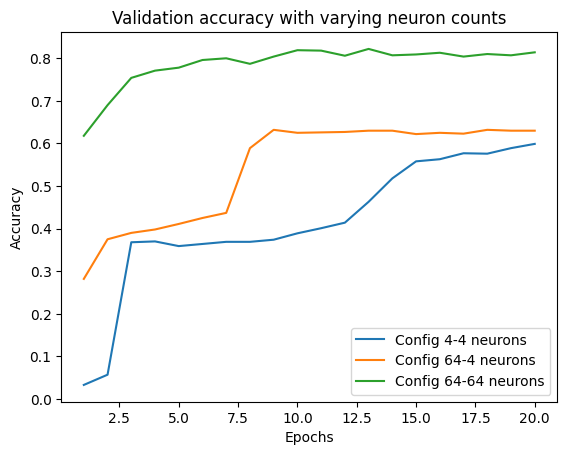

In [ ]:
# Configurations of neurons to try
neuron_configs = [(4, 4), (64, 4), (64, 64)]
val_accuracies = []

# Run training for each neuron configuration and collect validation accuracies
for nl1, nl2 in neuron_configs:
    val_acc = news_nn(nl1, nl2)
    val_accuracies.append(val_acc)

# Plotting all the validation accuracies
import matplotlib.pyplot as plt

epochs = range(1, 21)
for i, val_acc in enumerate(val_accuracies):
    plt.plot(epochs, val_acc, label=f'Config {neuron_configs[i][0]}-{neuron_configs[i][1]} neurons')

plt.title('Validation accuracy with varying neuron counts')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1-score and imbalance

Retrain the model from scratch on the train and validation data combined for nine epochs, but this time compute the test set F1-score and compare it to the test set accuracy.

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

# Define F1-score metric (macro-average across all classes)
import tensorflow as tf
f1_metric = tf.keras.metrics.F1Score(average='macro', name='f1_score')

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy",  f1_metric])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

# Evaluate on test set
test_loss, test_acc, test_f1 = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4042 - f1_score: 0.0336 - loss: 3.1746
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6763 - f1_score: 0.0957 - loss: 1.5711
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7453 - f1_score: 0.1751 - loss: 1.1597
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7986 - f1_score: 0.2793 - loss: 0.9425
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8395 - f1_score: 0.3609 - loss: 0.7775
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8627 - f1_score: 0.4448 - loss: 0.6350
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8906 - f1_score: 0.5779 - loss: 0.5325
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9079 - f1_score: 0.6654 - loss: 0.4333
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9184 - f1_score: 0.7453 - loss: 0.3816
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8023 - f1_score: 0.4